<a href="https://colab.research.google.com/github/EmmanueleVilla/QuantumComputing/blob/main/Hello%2C%20Quantum%20World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install qiskit --quiet

In [25]:
!pip install pylatexenc --quiet

In [26]:
import qiskit as qk
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
%matplotlib inline
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [27]:
api_key = open("api_key.txt", "r").read()

In [28]:
qk.IBMQ.save_account(api_key)

configrc.store_credentials:WARNING:2022-09-09 17:50:28,897: Credentials already present. Set overwrite=True to overwrite.


In [29]:
qk.IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-09-09 17:50:29,757: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
provider = qk.IBMQ.get_provider("ibm-q")

In [31]:
backends = provider.backends()
for backend in backends:
  if backend.properties() is not None:
    print(f"{backend.name()} has {len(backend.properties().qubits)} qubits and {backend.status().pending_jobs} pending jobs")

ibmq_lima has 5 qubits and 106 pending jobs
ibmq_belem has 5 qubits and 80 pending jobs
ibmq_quito has 5 qubits and 101 pending jobs
ibmq_manila has 5 qubits and 135 pending jobs
ibm_nairobi has 7 qubits and 143 pending jobs
ibm_oslo has 7 qubits and 275 pending jobs


In [32]:
quantum_computer = provider.get_backend("ibmq_belem")
quantum_simulator = qk.Aer.get_backend('qasm_simulator')

In [33]:
circuit = qk.QuantumCircuit(2, 2)

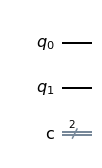

In [34]:
circuit.draw(output="mpl")

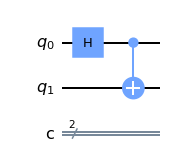

In [35]:
circuit.h(0)
circuit.cx(0, 1)
circuit.draw(output="mpl")

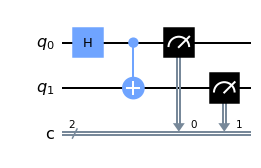

In [36]:
circuit.measure([0,1],[0,1])
circuit.draw(output="mpl")

In [37]:
real_job = qk.execute(circuit, backend=quantum_computer)
simulator_job = qk.execute(circuit, backend=quantum_simulator)

In [38]:
job_monitor(simulator_job)

Job Status: job has successfully run


In [39]:
job_monitor(real_job)

Job Status: job has successfully run


In [40]:
real_result = real_job.result()
simulator_result = simulator_job.result()

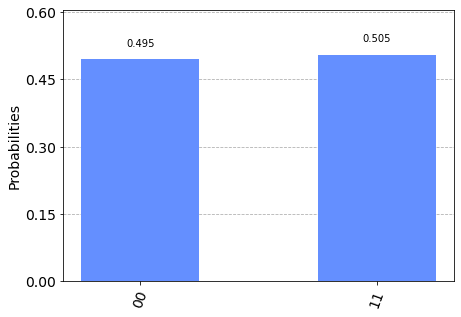

In [41]:
plot_histogram(simulator_result.get_counts(circuit))

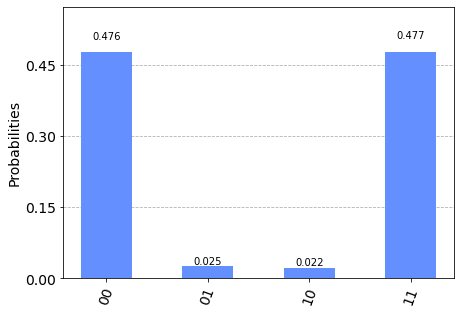

In [42]:
plot_histogram(real_result.get_counts(circuit))